In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [208]:
class Convolution():
    def __init__(self, A, T,start, end):
        self.A = A
        self.T = T
        self.f = 1 / T
        self.x = np.linspace(start, end, 1000, endpoint = False)
        self.signal = [A * np.sign(np.tan(np.pi * t / T)) for t in self.x]
    
    def create_noise(self):
        self.signal += np.random.normal(0, 1, self.x.shape)
    
    def core_of_exp(self):
        return self.A * np.exp(-(self.x**2))
    
    def core_of_line(self):
        return self.A * self.x
    
    def core_of_gausse(self, alpha = 0):
        N = len(self.x)
        y = np.zeros(N)
        M = (N - 1) /2
        for k in range(N):
            y[k] = np.exp(-0.5 * ((k - M)/(alpha * M))**2)
        return self.A * y

    def core_of_planka(self, eps=0):
        N = len(self.x)
        y = np.zeros(N)
        for k in range(N):
            if k == 0:
                y[k] = 0
            if 0 < k and k < eps * (N - 1):
                za = eps * (N - 1) * (1 / k + 1 / (k - eps * (N - 1)))
                y[k] = 1 / (np.exp(za) + 1)
            if eps * (N - 1) <= k and k <= (1 - eps) * (N - 1):
                y[k] = 1
            if (1 - eps) * (N - 1) < k and k < N - 1:
                zb = eps * (N - 1) * (1 / (N - 1 - k) + 1 / ((1 - eps) * (N - 1) - k))
                y[k] = 1 / (np.exp(zb) + 1) 
            if k == N - 1:
                y[k] = 0
        return y
    
    def conv_by_np(self, core):
        return np.convolve(self.signal, core, mode='same') / sum(core) 
        
    def my_conv(self, core):
        c = np.ones(max(len(self.signal), len(core)))
        for i in range(len(c)):
            for k in range(len(core)):
                c[i] += self.signal[i - k] * core[k]
        return c / sum(core)
    
    def signal_spectrum(self, core = None, print = False):
        """
        Нахождение спектра сигнала

        Параметры
        ---------
        x - аргументы функции
        y - значения функции

        Возвращает
        ----------
        
        """
        if core is None:
            xff = np.arange(len(self.x))
            yff = np.fft.fft(self.signal) / len(self.x)
        else:
            xff = np.arange(len(self.x))
            yff = np.fft.fft(core) / len(self.x)
        if print:
            plt.ylim(0, 3)
            plt.xlim(0, 100)
            plt.xlabel('Частота, Гц')
            plt.ylabel('Амплитуда, м')
            plt.title('fft')
            plt.plot(xff, np.abs(self.A * yff))
            plt.show()
        return xff, yff 
    
    def print_conv_by_ifft(self, yf1, yf2, xf1, conv):
        Y = yf1 * yf2
        ydw = np.fft.ifft(Y * len(xf1))
        plt.xlabel('Время, с')
        plt.ylabel('Амплитуда, м')
        plt.grid()
        plt.plot(self.x, self.A * ydw)
        plt.plot(self.x, conv,'r--')
        plt.show()

    def print_conv(self, conv1, conv2 = None):
        plt.xlabel('Время, t')
        plt.ylabel('Амплитуда, м')
        plt.plot(self.x, conv1)
        if not conv2 is None:
            plt.plot(self.x, conv2, 'r--')
        plt.title('Свертка')
        plt.grid()
        plt.show() 

    def print_core(self, core):
        plt.xlabel('Время, t')
        plt.ylabel('Амплитуда, м')
        plt.plot(self.x, core)
        plt.title('Ядро')
        plt.grid()
        plt.show() 

    def print_original_signal(self):
        plt.xlabel('Время, t')
        plt.ylabel('Амплитуда, м')
        plt.plot(self.x, self.signal)
        plt.title('Сигнал')
        plt.grid()
        plt.show()   
    



### Задание №1

In [209]:
T = 2.0
A = 2.0
F = 100
N0 = 1000
START = -4.0
END = 4.0

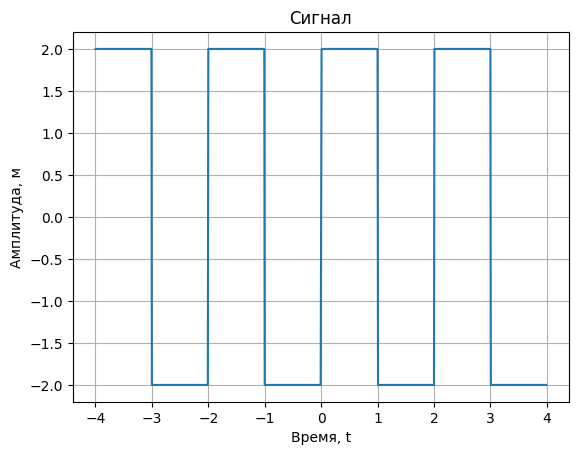

In [210]:
signal = Convolution(2.0, 2.0,-4.0, 4.0 )
signal.print_original_signal()

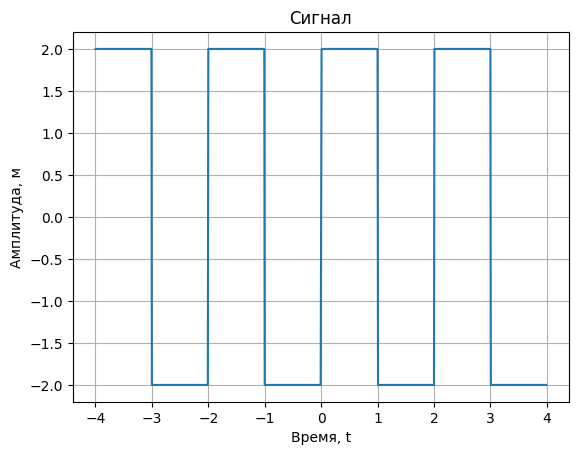

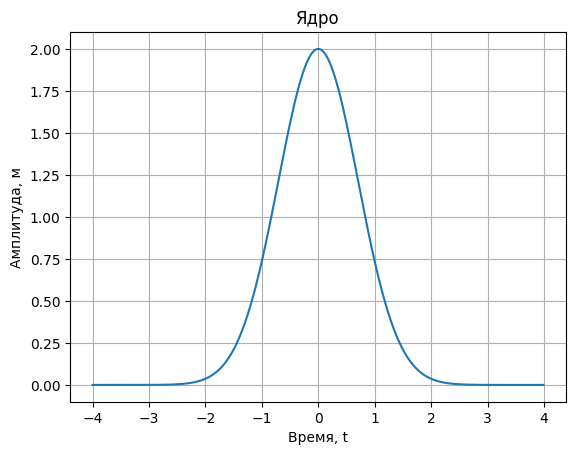

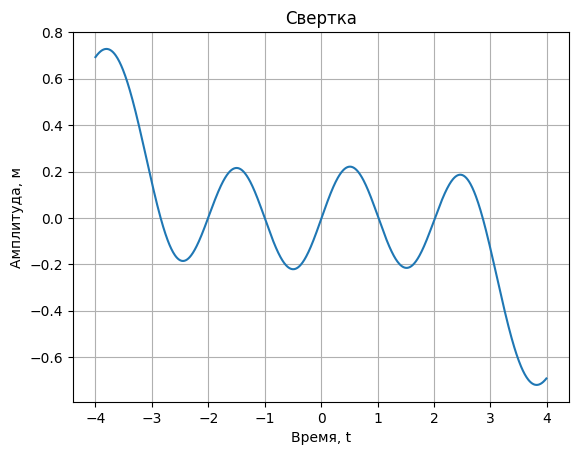

In [211]:
CORE_1 = signal.core_of_exp()
CONV_1  = signal.conv_by_np(CORE_1)

signal.print_original_signal()
signal.print_core(CORE_1)
signal.print_conv(CONV_1)

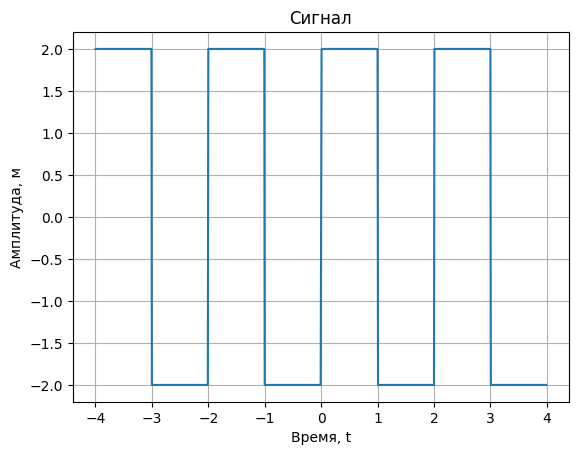

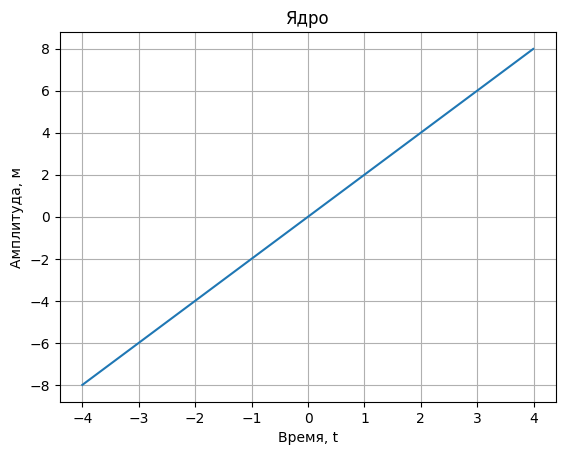

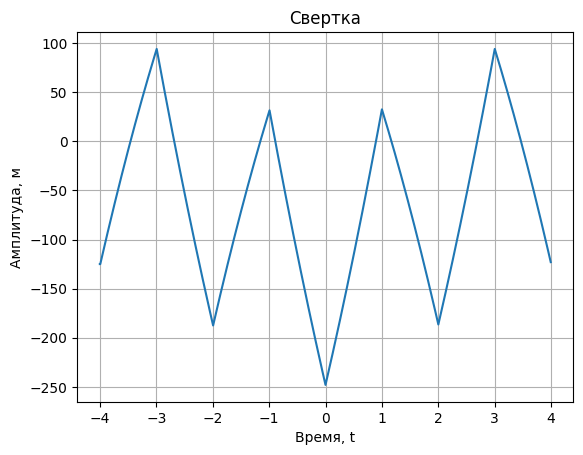

In [212]:
CORE_2 = signal.core_of_line()
CONV_2  = signal.conv_by_np(CORE_2)

signal.print_original_signal()
signal.print_core(CORE_2)
signal.print_conv(CONV_2)

### Задание №2

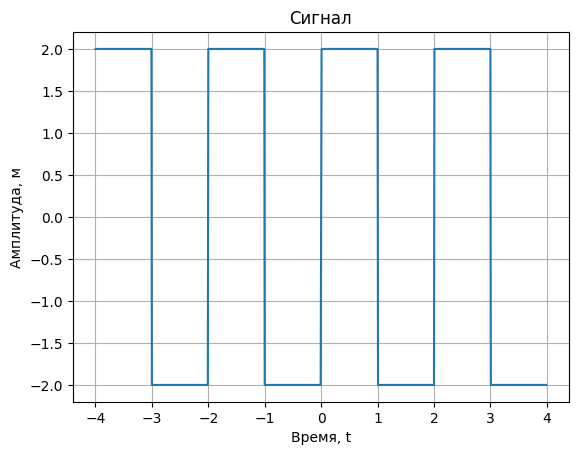

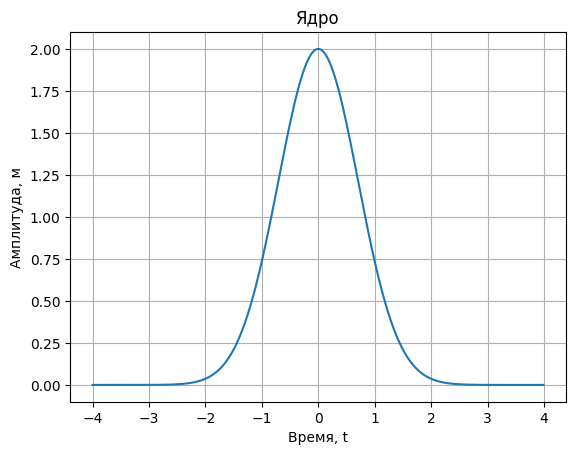

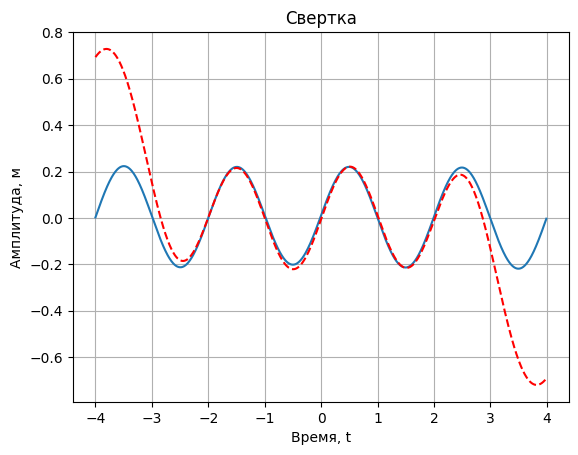

In [213]:
MY_CONV_1  = signal.my_conv(CORE_1)

signal.print_original_signal()
signal.print_core(CORE_1)
signal.print_conv(MY_CONV_1, CONV_1)

### Задание №3

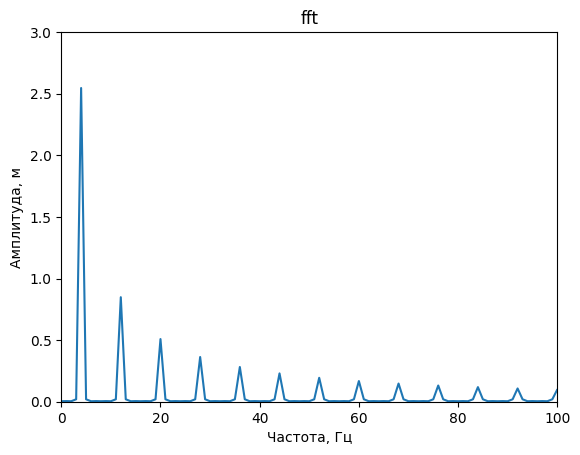

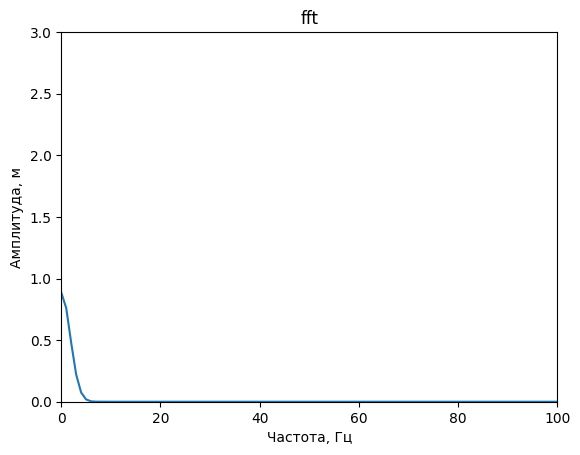

c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


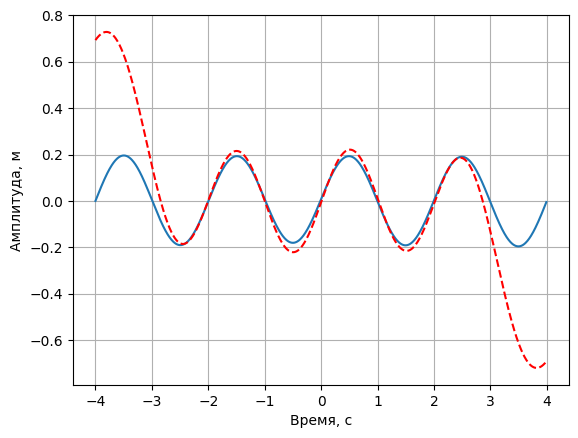

In [214]:
xf1, yf1 = signal.signal_spectrum(print=True)

xf2, yf2 = signal.signal_spectrum(CORE_1, print=True)

signal.print_conv_by_ifft(yf1, yf2, xf1, CONV_1)

### Задание №4

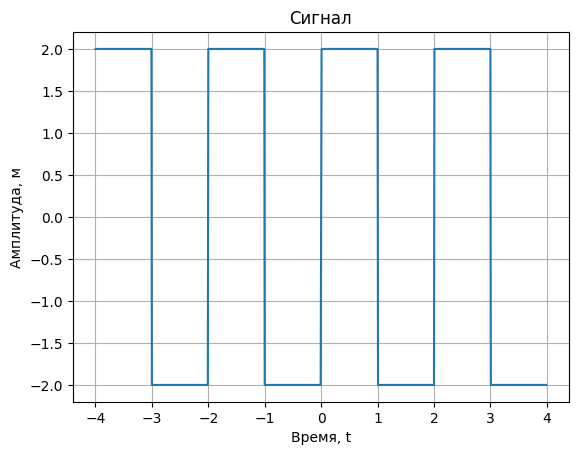

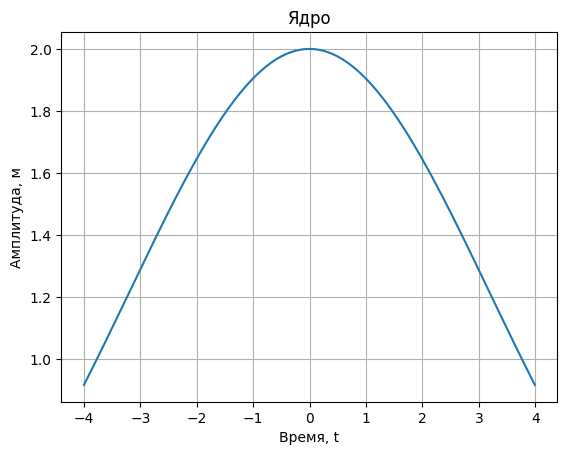

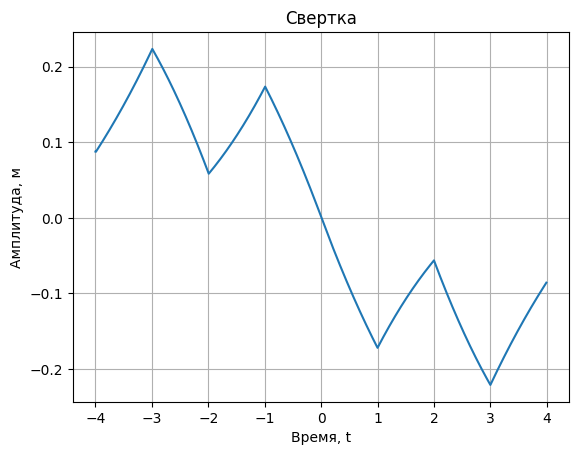

In [215]:
CORE_3 = signal.core_of_gausse(0.8)
CONV_3  = signal.conv_by_np(CORE_3)

signal.print_original_signal()
signal.print_core(CORE_3)
signal.print_conv(CONV_3)

### Задание №5

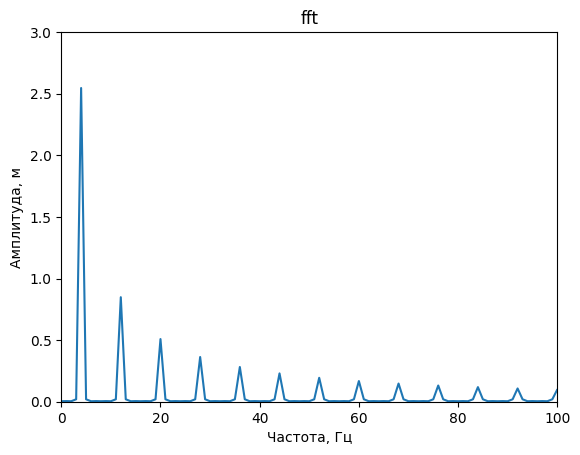

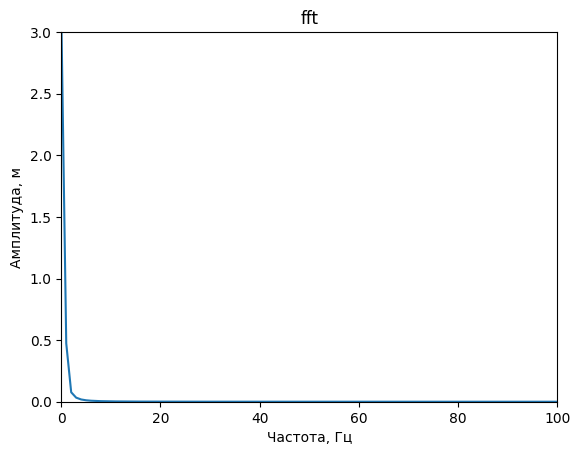

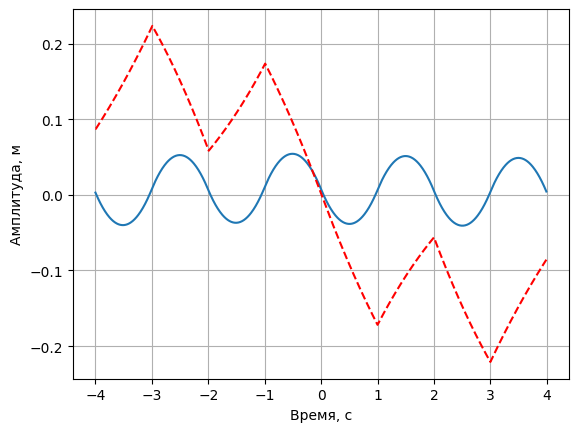

In [216]:
xf1, yf1 = signal.signal_spectrum(print=True)

xf2, yf2 = signal.signal_spectrum(CORE_3, print=True)

signal.print_conv_by_ifft(yf1, yf2, xf1, CONV_3)

### Задание №6

In [217]:
E = 0.2

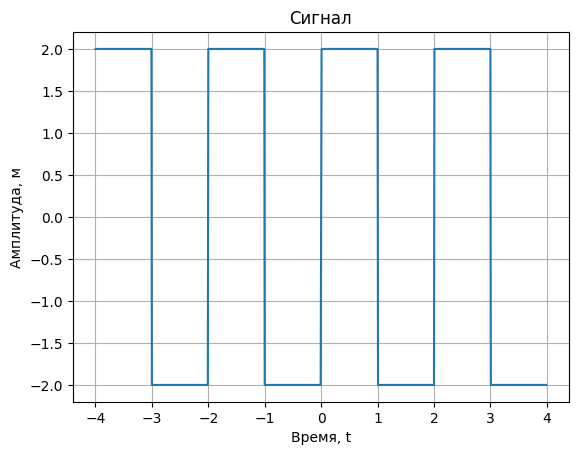

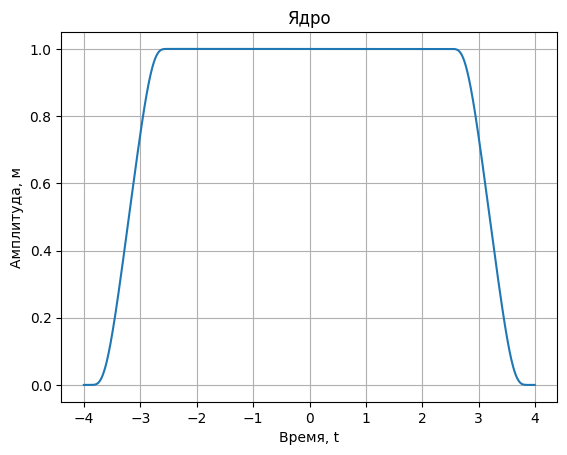

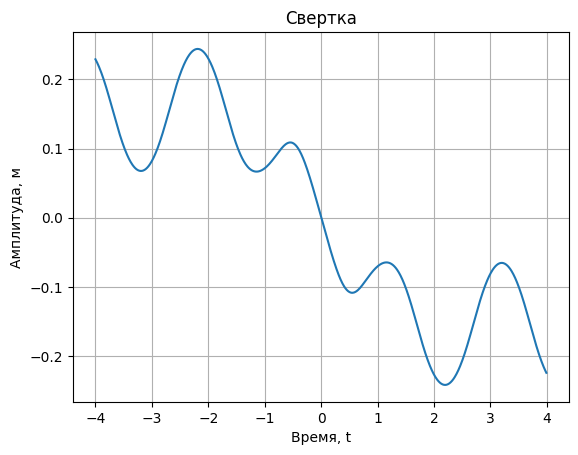

In [218]:
CORE_4 = signal.core_of_planka(E)
CONV_4  = signal.conv_by_np(CORE_4)

signal.print_original_signal()
signal.print_core(CORE_4)
signal.print_conv(CONV_4)
